In [ ]:
#Importing the required libraries

import pandas as pd
from matplotlib import pyplot as plt 
from zlib import crc32
import numpy as np

In [ ]:
# Download the dataset
!git clone https://github.com/ageron/handson-ml2.git

Cloning into 'handson-ml2'...
remote: Enumerating objects: 2167, done.
remote: Total 2167 (delta 0), reused 0 (delta 0), pack-reused 2167
Receiving objects: 100% (2167/2167), 126.54 MiB | 30.14 MiB/s, done.
Resolving deltas: 100% (1304/1304), done.


In [ ]:
#Convert the csv file to pandas dataframe
housing = pd.read_csv("/content/handson-ml2/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


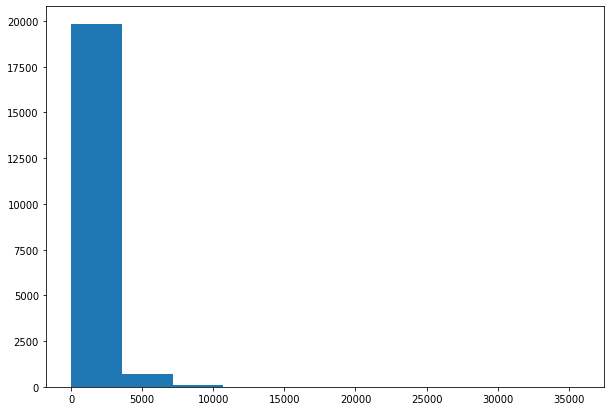

In [ ]:
# HISTOGRAMS
def histogram(str):
  fig, ax = plt.subplots(figsize =(10, 7)) 
  ax.hist(housing[str]) 
  # Show plot 
  plt.show() 

histogram("population")

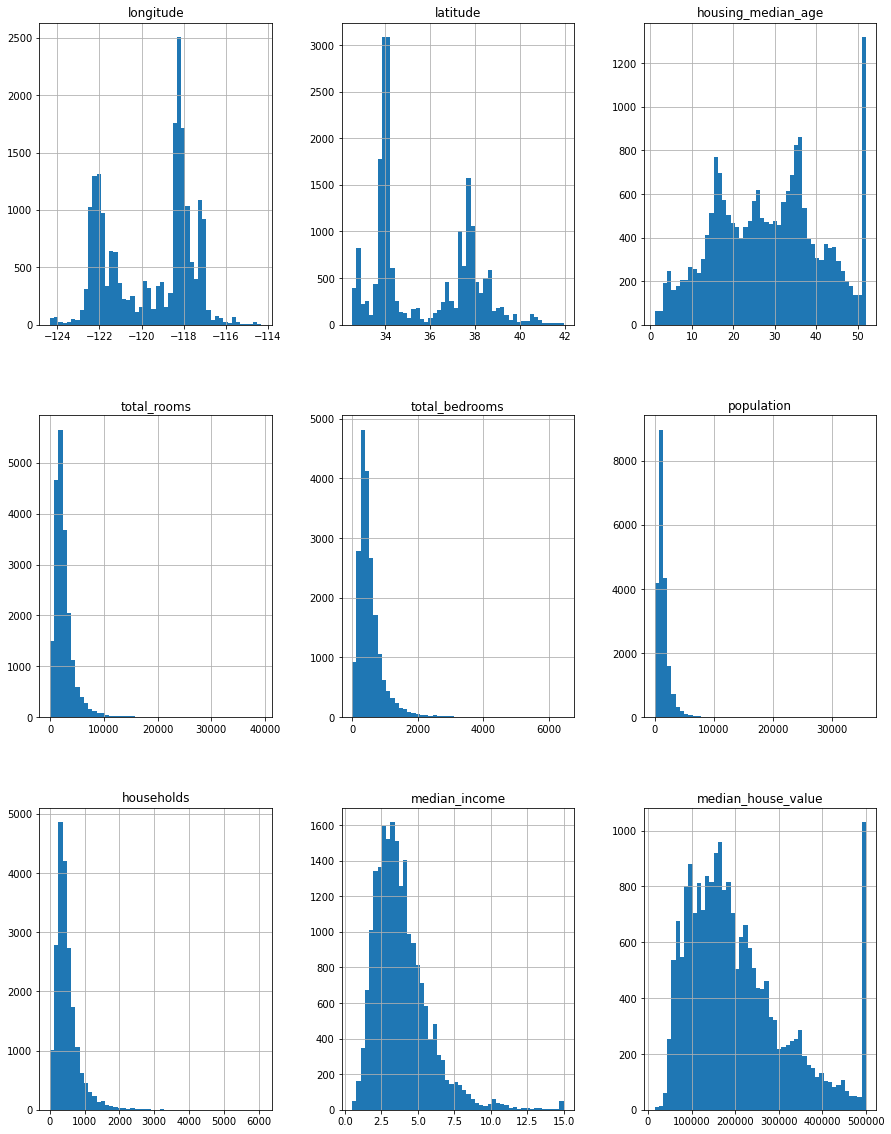

In [ ]:
#Histograms for all attributes

housing.hist(bins=50,figsize=(15,20))
plt.show()

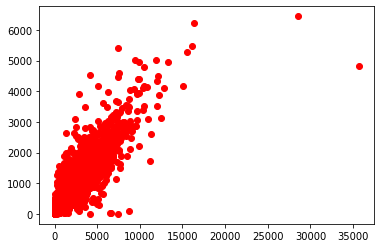

In [ ]:
#Scatter plot showing the relation between population and total bedrooms
plt.plot(housing["population"],housing["total_bedrooms"],"or")

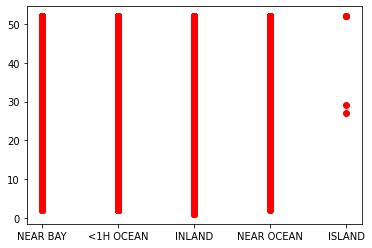

In [ ]:
plt.plot(housing["ocean_proximity"],housing["housing_median_age"],"or")

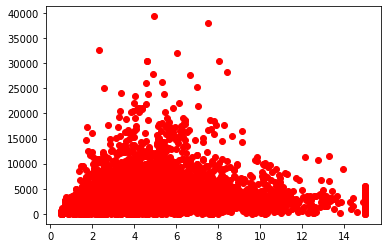

In [ ]:
plt.plot(housing["median_income"],housing["total_rooms"],"or")

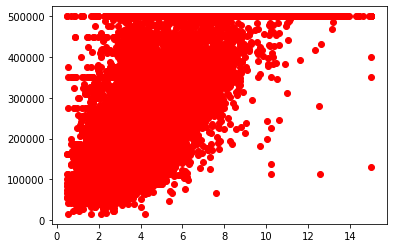

In [ ]:
#Scatter plot showing the capped median house values and visible horizontal lines at 44000,34000 etc. These data points need to be eliminated

plt.plot(housing["median_income"],housing["median_house_value"],"or")

In [ ]:
#Categorical values for the ocean_proximity attribute

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Pandas describe function gives the statistics for each attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


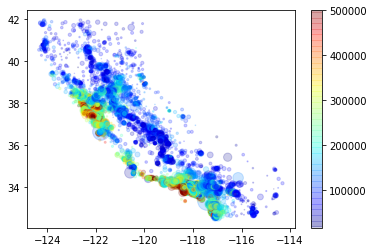

In [ ]:
#Scatter plot showing the california region with colobar showing the median house value and circular radius of each point showing the region population

plt.scatter(housing["longitude"],housing["latitude"],alpha=0.2,s=housing["population"]/100,c=housing["median_house_value"],cmap="jet")
plt.colorbar()
plt.show()

In [ ]:
# Finding the correlations between different attributes
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
index                 0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32eb783da0>,
      dtype=object)

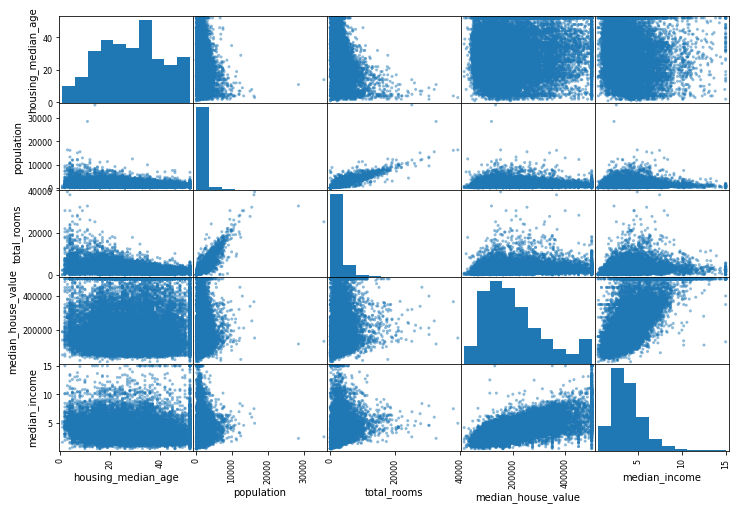

In [ ]:
# Plotting attributes vs attributes using scatter matrix 
from pandas.plotting import scatter_matrix
attributes = ["housing_median_age","population","total_rooms","median_house_value","median_income"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [ ]:
#creating more attributes and checking for correlation

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"] = housing["population"]/housing["households"]

correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
index                       0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

In [ ]:
#Creating train and test splits - this method won't help when the dataset is shuffled

housing_train = housing.sample(frac=0.8)
housing_test = housing.sample(frac=0.2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18254,-122.09,37.39,36.0,1035.0,196.0,475.0,205.0,5.5385,359000.0,NEAR BAY
14243,-117.10,32.69,11.0,3071.0,911.0,2812.0,774.0,1.2413,83100.0,NEAR OCEAN
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,90700.0,INLAND
6094,-117.88,34.12,33.0,1485.0,274.0,1006.0,258.0,5.1708,158500.0,<1H OCEAN
16800,-122.42,37.67,42.0,2274.0,429.0,1255.0,397.0,5.1205,226300.0,NEAR OCEAN


In [ ]:
#create index column
housing = housing.reset_index()

In [ ]:
#To create permanent train and test sets

#function to split train/test data
def split_train_test(data,test_ratio,index):
  ids = data[index]
  in_test = ids.apply(lambda id: crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32)
  return in_test

in_test = split_train_test(housing,0.2,"index")
print(type(in_test))
test_set = housing.loc[in_test]
train_set = housing.loc[~in_test]


<class 'pandas.core.series.Series'>


In [ ]:
#creating labels
housing = train_set.drop("median_house_value",axis=1)
labels = train_set["median_house_value"]

In [ ]:
#Data cleaning

#replace na values in total_bedrooms with the median value 

#METHOD 1
median_bedrooms = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median_bedrooms,inplace=True)

#METHOD2
from sklearn.impute  import SimpleImputer
impute = SimpleImputer(strategy="median")
housing_numerical = housing.drop("ocean_proximity",axis=1)
impute.fit(housing_numerical)
#impute.statistics_  #check stats
X = impute.transform(housing_numerical) #applies median value to al NA and returns an array of training data
housing_df = pd.DataFrame(X,columns=housing_numerical.columns) #creating a dataframe from the array X


In [ ]:
#Transforming text categories into oneHot matrices

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
housing_text = housing[["ocean_proximity"]]
onehot_cat = onehot_encoder.fit_transform(housing_text)
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:

#The data transformation steps can be combined using tranformation pipelines,
#Creating a transformation pipeline - data transformation steps that need to be executed in order.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#For numerical attributes
num_pipeline = Pipeline([
                         ("imputer",SimpleImputer(strategy="median")),
                         ("std_scaler",StandardScaler())
])

#combining numerical and categorical attributes using a column transformer
from sklearn.compose import ColumnTransformer
housing_numerical = housing.drop("ocean_proximity",axis=1)
numerical_attr = list(housing_numerical)
categorical_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer(transformers=[
                                   ("num",num_pipeline,numerical_attr),
                                   ("cat",OneHotEncoder(),categorical_attr)
])

housing_full_train = full_pipeline.fit_transform(housing)
housing_full_train[:5]


array([[-1.73214841, -1.32797276,  1.05260289,  0.98486008, -0.79943718,
        -0.96211596, -0.98718298, -0.96729661,  2.35626118,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.73198056, -1.32298406,  1.04324218, -0.60432091,  2.01984297,
         1.33198971,  0.86809135,  1.64100453,  2.34368138,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.73164486, -1.33795015,  1.03856183,  1.85890962, -0.62082383,
        -0.71321606, -0.77657944, -0.72760095,  0.93860295,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.73147702, -1.33795015,  1.03856183,  1.85890962, -0.46079716,
        -0.60755101, -0.77033273, -0.62450605, -0.01117151,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.73114132, -1.33795015,  1.03388147,  1.85890962, -0.04917047,
        -0.11679555, -0.29825956,  0.03272399, -0.1100656 ,  0.        ,
         0.        ,  0.  

In [ ]:
#Data for cross validation taken from the taining data

valid_set = housing.iloc[:5]
valid_labels = labels.iloc[:5]
housing.iloc[:5]


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY


In [ ]:
# Model Training

#1st Model - Linear Regressor
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(housing_full_train,labels)

#validation for linear regression
#print("Predictions",model1.predict(valid_tr))
#print("Labels",list(valid_labels))

#1st Model - root mean squared error
from sklearn.metrics import mean_squared_error
housing_predictions = model1.predict(housing_full_train)
lin_mse = mean_squared_error(labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

#K-fold cross validation
scores = cross_val_score(model1,housing_full_train,labels,scoring="neg_mean_squared_error",cv=10)
scores

array([-7.63657283e+09, -3.49422824e+09, -8.25124628e+09, -3.96951517e+09,
       -6.72621659e+09, -4.66136993e+09, -2.87971011e+09, -7.82754465e+09,
       -6.01305510e+09, -3.39699392e+09])

In [ ]:
#MODEL TRAINING

#2nd Model - Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(housing_full_train,labels)

#RMSE
housing_predictions = model2.predict(housing_full_train)
dreg_mse = mean_squared_error(labels,housing_predictions)
dreg_rmse = np.sqrt(lin_mse)
#dreg_rmse = 0

#Since the rmse is 0, the model is most probably overfitting the data. We can use k-fold cross validation
#to check if the score is actually 0 as this method provides better validation.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,housing_full_train,labels,scoring="neg_mean_squared_error",cv=10)
rmse = np.sqrt(scores)
scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


array([-1.63354752e+10, -1.14735819e+10, -1.07047372e+10, -7.16825280e+09,
       -1.24578952e+10, -1.40984792e+10, -5.00551515e+09, -1.57285057e+10,
       -1.11367583e+10, -1.47702599e+10])

In [ ]:
#MODEL TRAINING

#3rd model - Random Forests
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(housing_full_train,labels)

#Mean squared error
housing_predictions = model3.predict(housing_full_train)
randomforest_mse = mean_squared_error(labels,housing_predictions)
randomforest_rmse = np.sqrt(randomforest_mse)
randomforest_rmse

17709.177756781948